In [70]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import dtype
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score,confusion_matrix, classification_report, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [96]:
df_test = pd.read_csv("M:/SOL/ML_intern_task/Dataset/mitbih_test.csv")
df_train = pd.read_csv("M:/SOL/ML_intern_task/Dataset/mitbih_train.csv")
df_abn = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_abnormal.csv")
df_n = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_normal.csv")

# Perform EDA

Shape of datasets

In [3]:
print(df_train.shape)
print(df_test.shape)
print(df_abn.shape)
print(df_n.shape)

(87553, 188)
(21891, 188)
(10505, 188)
(4045, 188)


In [ ]:
df_train.describe()

In [ ]:
df_test.describe()

copied datsets to another datframe 👇

In [97]:
df1 = df_train
df2 = df_test
df3 = df_abn
df4 = df_n

Giving name to the columns

In [71]:
# Giving name to the columns
#df_train, df_test, df_abn, df_n

#m,n = df_train.shape
#m,n = df_test.shape
#m,n = df1.shape
m,n = df2.shape
print(m,n)
col_name = []
for i in range(n):
    if i == n-1:
        col_name.append('target')
    else:
        col_name.append('feature'+str(i))
#df_train.columns = col_name
#df_test.columns = col_name
#df1.columns = col_name
df2.columns = col_name

21891 188


In [ ]:
df_train.corr()
#df_test
#df1

In [ ]:
df1.iloc[500:550,130:145]

In [ ]:
df1.columns

In [ ]:
df_train.info()

In [ ]:
#if there are any NULL values in the dataset
df_train.isnull().sum().plot().legend().set_visible(False)

In [ ]:
df_test.isnull().sum().plot().legend().set_visible(False)

In [ ]:
corr = df_train.corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

In [ ]:
sns.catplot(data=df1, x="feature132", y="target", kind='bar')

In [ ]:
sns.kdeplot(data = df1, x = 'feature69', hue = 'target')

In [ ]:
subset_features = ['feature45', 'feature135', 'feature185']  
n = len(subset_features)
cols = 2
rows = (n//cols)+(n%cols>0)

plt.figure(figsize=(10, 4 * rows))

for i, feature in enumerate(subset_features, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df1[feature], kde=True, bins=36) #type: ignore
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

In [ ]:
target_col = 'target'
plt.figure(figsize=(7, 4))
sns.histplot(df1["target"], kde=True, bins=30)  #type: ignore
plt.title(f'Histogram of {target_col} column')
plt.xlabel(target_col)
plt.ylabel('Samples per target')
plt.show()

In [ ]:
sns.relplot(data=df1, x = "feature109", y = "target", kind="line")

In [22]:
#print(df1.iloc[:,:-1].shape)
X_df1 = df1.iloc[:,:-1]
y_df1 = df1.iloc[:,-1:]
print(X_df1.shape, y_df1.shape)
y_df1['target'].unique()

array([0., 1., 2., 3., 4.])

In [24]:
df1_cats = {}

categories = df1['target'].unique()
for category in categories:
    df1_cats[category] = df_train[df_train['target'] == category]

df1_cats.keys()

In [26]:
k_df1 = len(df1_cats)
k_df1, df1_cats.keys()

(5, dict_keys([0.0, 1.0, 2.0, 3.0, 4.0]))

In [27]:
df1_cats_1 = df1_cats[0]
df1_cats_2 = df1_cats[1]
df1_cats_3 = df1_cats[2]
df1_cats_4 = df1_cats[3]
df1_cats_5 = df1_cats[4]

df1_cats_1.shape, df1_cats_2.shape, df1_cats_3.shape, df1_cats_4.shape, df1_cats_5.shape

In [29]:
df1_cats_concat = pd.concat([df1_cats_1, df1_cats_2, df1_cats_3, df1_cats_4, df1_cats_5], axis=0)

In [40]:
df1_cats_concat['feature131'].unique() 

array([0.05413105, 0.        , 0.10798122, ..., 0.6356073 , 0.65864664,
       0.6306991 ])

In [ ]:
df1_cats_concat.describe()

In [ ]:

target = df1.columns[-1]

plt.figure(figsize=(15,8))

for feature in X_df1.columns:  
    plt.scatter(df1[feature], df1[target],
                label = feature)
    
plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title("Target vs Features")
plt.legend().set_visible(False)  
plt.show()

### MIT_BIH Train Data 

In [13]:
df_train_unique = df_train.iloc[:,-1].unique()
df_train_unique, df_train.shape

(array([0., 1., 2., 3., 4.]), (87553, 188))

In [ ]:
df_train.isnull().sum() 

In [ ]:
df_train.describe()#.iloc[:,80:100]

In [15]:
stats = df_train.describe()
spc_stats = stats.loc[['mean', 'std','25%','50%','75%']]
#print(spc_stats)

In [ ]:
spc_stats.plot().legend().set_visible(False)

### MIT_BIH Test Data 

In [ ]:
df_test

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test.describe()

In [14]:
df_test_unique = df_test.iloc[:,-1].unique()
df_test_unique, df_test.shape

(array([0., 1., 2., 3., 4.]), (21891, 188))

In [23]:
stats2 = df_test.describe()
spc_stats2 = stats2.loc[['mean', 'std','25%','50%','75%']]

In [ ]:
spc_stats2.plot().legend().set_visible(False)

### PTB Diagnosotic abnormal ecg data

In [25]:
df_abn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Columns: 188 entries, 9.322328567504882812e-01 to 1.000000000000000000e+00.1
dtypes: float64(188)
memory usage: 15.1 MB


In [ ]:
df_abn

In [ ]:
df_abn.describe()

In [ ]:
df_abn.isnull().sum()

In [23]:
spc_stats3 = df_abn.describe().loc[['mean', 'std','25%','50%','75%']]

In [ ]:
spc_stats3.plot().legend().set_visible(False)

### PTB Diagnosotic normal ecg data

In [ ]:
df_n.head(5)
#df_n

In [ ]:
df_n.describe()

In [ ]:
df_n.isnull().sum()

In [28]:
spc_stats4 = df_n.describe().loc[['mean', 'std','25%','50%','75%']]

In [ ]:
spc_stats4.plot().legend().set_visible(False)

In [46]:
#sns.boxplot(x=df_train.iloc[180]) 

# Finding Outliers 

In [29]:
from scipy import stats

Z-Score

In [30]:
z_scores = stats.zscore(df_train, axis = 1)
outliers_mask = (np.abs(z_scores)>3).any(axis = 1)
outliers = df_train[outliers_mask]

In [ ]:
outliers.describe()

In [ ]:
#print(outliers.shape)
#outliers.iloc[:,:].plot().legend().set_visible(False)

Interquartile Range (IQR)

In [ ]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

outliers_bool = (df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))

outliers_count_per_column = outliers_bool.sum()
count = 0
for i in range(len(outliers_count_per_column)):
    if outliers_count_per_column.iloc[i] > 0:
        count+=1
        print(outliers_count_per_column.iloc[i])
print(f"No. of Columns with ouliers: {count}")

In [ ]:
rows_with_outliers = outliers_bool.any(axis=1)
outliers_2 = df_train[rows_with_outliers]
outliers_2


In [ ]:
outliers_2.describe()

In [111]:
#outliers_2.plot().legend().set_visible(False)

The df_train is labeled because the last column of dftrain has 5 unique values. And about unique values in this case that's not so important

# Apply Supervised learning

## MIT_BIH

In [16]:
print(df_train.shape, df1.shape)
#df_train

(87553, 188) (87553, 188)


In [98]:
X1  = df_train.iloc[:,:-1]
y1 = df_train.iloc[:,-1]

Sapmpling Class

In [99]:
class Samplingdata:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def smote(self):
        smote = SMOTE(random_state=42, k_neighbors=3)#, n_jobs=-1
        X_smote, y_smote = smote.fit_resample(self.X, self.y)#type: ignore
        return X_smote, y_smote
    def tomek(self):
        tomek = TomekLinks()
        X_tomek, y_tomek = tomek.fit_resample(self.X, self.y)#type: ignore
        return X_tomek, y_tomek
    def smote_tomek(self):
        smt = SMOTETomek(random_state=42)
        X_smt, y_smt = smt.fit_resample(self.X, self.y)#type: ignore
        return X_smt, y_smt

Model Class

In [100]:
class Model:
    def __init__ (self, model, X_train, X_test, y_train, y_test):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    def model_fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    def model_report(self, y_pred, y_test):
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred, normalize='true')
        classification = classification_report(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1Score = f1_score(y_test, y_pred, average='weighted')
        return accuracy, confusion, classification, recall, precision, f1Score
    def model_pred(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred
        
        

In [53]:
X1_oversample, y1_oversample = Samplingdata(X1, y1).smote()

In [54]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X1_oversample, y1_oversample, test_size=0.2, random_state=42, stratify=y1_oversample)

In [23]:
X1_undersample, y1_undersample = Samplingdata(X1, y1).tomek()

In [24]:
X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek = train_test_split(X1_undersample, y1_undersample, test_size=0.2, random_state=42, stratify=y1_undersample)

In [55]:
X1_Smotek, y1_Smotek = Samplingdata(X1, y1).smote_tomek()

In [56]:
X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek = train_test_split(X1_Smotek, y1_Smotek, test_size=0.2, random_state=42, stratify=y1_Smotek)

Logistic Regression

In [27]:
model_logistic_reg = LogisticRegression(random_state=42, max_iter=100, multi_class='auto', solver='liblinear')

In [28]:
MyModel1 = Model(model_logistic_reg, X_train_smote, X_test_smote, y_train_smote, y_test_smote)
fit_model1 = MyModel1.model_fit(X_train_smote,  y_train_smote)

In [29]:
prediction1 = MyModel1.model_pred(X_test_smote)
model_accu_1, model_con_mat_1, model_cl_report_1, model_recall_1, model_precision_1, model_F1_1 = MyModel1.model_report(prediction1, y_test_smote)

In [30]:
print(f"accuracy is: {model_accu_1}")
print(f"Precision: {model_precision_1}")
print(f"Recall: {model_recall_1}")
print(f"F1_Score: {model_F1_1}")
print(f"confusion_matrix:\n {model_con_mat_1}")
print(f"classification:\n {model_cl_report_1}")

accuracy is: 0.7847523113012281
Precision: 0.7860724891566376
Recall: 0.7847523113012281
F1_Score: 0.7845514659237408
confusion_matrix:
 [[0.63012281 0.1232924  0.12853595 0.08679454 0.03125431]
 [0.21422658 0.72271285 0.03698082 0.01911136 0.0069684 ]
 [0.10093832 0.02745964 0.75803781 0.0802401  0.03332413]
 [0.05678212 0.00572651 0.04898579 0.88705671 0.00144888]
 [0.0278736  0.00420864 0.03753277 0.00455361 0.92583138]]
classification:
               precision    recall  f1-score   support

         0.0       0.61      0.63      0.62     14494
         1.0       0.82      0.72      0.77     14494
         2.0       0.75      0.76      0.75     14494
         3.0       0.82      0.89      0.85     14494
         4.0       0.93      0.93      0.93     14494

    accuracy                           0.78     72470
   macro avg       0.79      0.78      0.78     72470
weighted avg       0.79      0.78      0.78     72470



In [ ]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_1, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [31]:
Model2 = Model(model_logistic_reg, X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek)
fit_model2 = Model2.model_fit(X_train_tomek, y_train_tomek)

In [32]:
prediction2 = Model2.model_pred(X_test_tomek)
model_accu_2, model_con_mat_2, model_cl_report_2, model_recall_2, model_precision_2, model_F1_2 = Model2.model_report(prediction2, y_test_tomek)

In [33]:
print(f"accuracy is: {model_accu_2}")
print(f"Precision: {model_precision_2}")
print(f"Recall: {model_recall_2}")
print(f"F1_Score: {model_F1_2}")
print(f"confusion_matrix:\n {np.around(model_con_mat_2, decimals=2)}")
print(f"classification:\n {model_cl_report_2}")

accuracy is: 0.9075987144168962
Precision: 0.8940525664611457
Recall: 0.9075987144168962
F1_Score: 0.8898084291274362
confusion_matrix:
 [[0.99 0.   0.01 0.   0.  ]
 [0.74 0.19 0.06 0.   0.  ]
 [0.67 0.01 0.3  0.   0.02]
 [0.88 0.   0.05 0.07 0.  ]
 [0.11 0.   0.01 0.   0.88]]
classification:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     14455
         1.0       0.72      0.19      0.31       421
         2.0       0.63      0.30      0.41      1139
         3.0       0.82      0.07      0.13       128
         4.0       0.96      0.88      0.92      1281

    accuracy                           0.91     17424
   macro avg       0.81      0.49      0.54     17424
weighted avg       0.89      0.91      0.89     17424



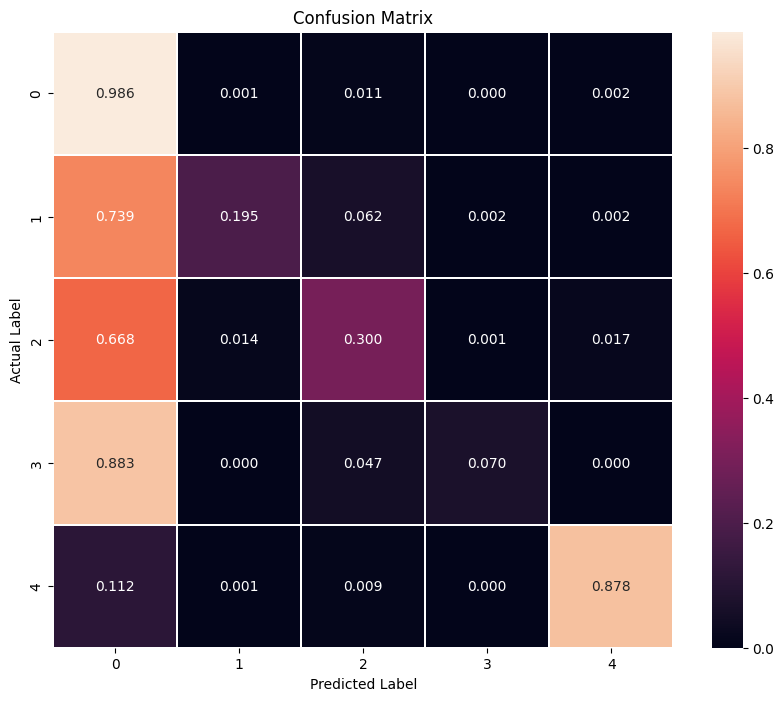

In [34]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_2, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Model Gets Biased if Undersampled 👆

In [30]:
Model3 = Model(model_logistic_reg, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
fit_model3 = Model3.model_fit(X_train_smotek, y_train_smotek)

In [ ]:
prediction3 = Model3.model_pred(X_test_smotek)
model_accu_3, model_con_mat_3, model_cl_report_3, model_recall_3, model_precision_3, model_F1_3 = Model3.model_report(prediction3, y_test_smotek)


In [ ]:
print(f"accuracy is: {model_accu_3}")
print(f"Precision: {model_precision_3}")
print(f"Recall: {model_recall_3}")
print(f"F1_Score: {model_F1_3}")
print(f"confusion_matrix:\n {np.around(model_con_mat_3, decimals=2)}")
print(f"classification:\n {model_cl_report_3}")

In [ ]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_3, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Decision Tree

In [57]:
#model_decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, random_state=0, min_samples_leaf=5, min_samples_split=2)
model_decision_tree = DecisionTreeClassifier(random_state=0)

In [58]:
Model4 = Model(model_decision_tree, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
fit_model4 = Model4.model_fit(X_train_smotek,  y_train_smotek)

In [59]:
prediction4 = Model4.model_pred(X_test_smotek)
model_accu_4, model_con_mat_4, model_cl_report_4, model_recall_4, model_precision_4, model_F1_4 = Model4.model_report(prediction4, y_test_smotek)

In [60]:
print(f"accuracy is: {model_accu_4}")
print(f"Precision: {model_precision_4}")
print(f"Recall: {model_recall_4}")
print(f"F1_Score: {model_F1_4}")
print(f"confusion_matrix:\n {np.around(model_con_mat_4, decimals=3)}")
print(f"classification:\n {model_cl_report_4}")

accuracy is: 0.9811922174692976
Precision: 0.9811476472763027
Recall: 0.9811922174692976
F1_Score: 0.9811265891693697
confusion_matrix:
 [[0.946 0.025 0.016 0.007 0.006]
 [0.013 0.985 0.001 0.    0.   ]
 [0.01  0.001 0.985 0.003 0.002]
 [0.003 0.    0.002 0.995 0.   ]
 [0.003 0.001 0.001 0.    0.995]]
classification:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     14494
         1.0       0.97      0.99      0.98     14494
         2.0       0.98      0.98      0.98     14494
         3.0       0.99      0.99      0.99     14494
         4.0       0.99      0.99      0.99     14494

    accuracy                           0.98     72470
   macro avg       0.98      0.98      0.98     72470
weighted avg       0.98      0.98      0.98     72470



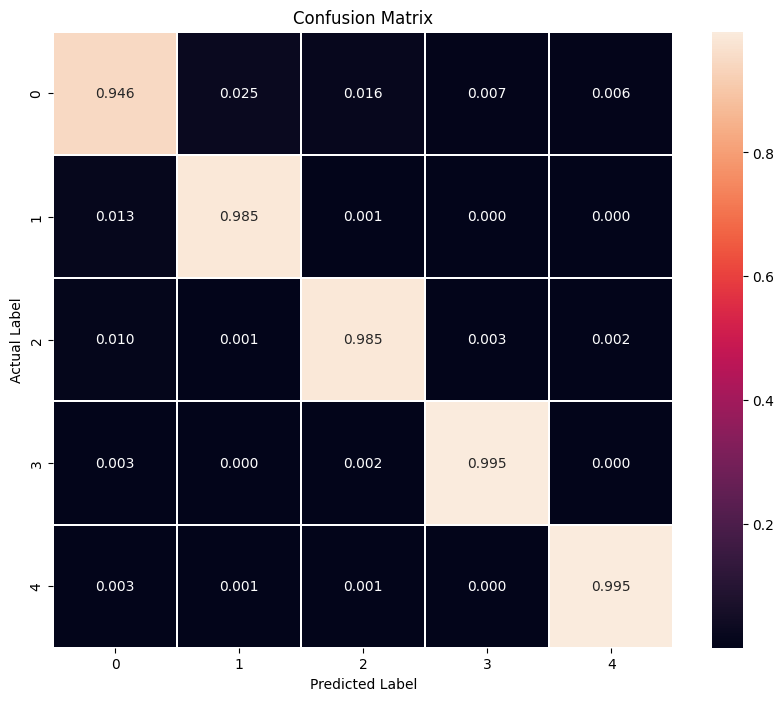

In [61]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_4, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Apply on unseen data

In [62]:
X_df_test = df_test.iloc[:,:-1]
y_df_test = df_test.iloc[:,-1]

In [64]:
Smotek_X_df_test, Smotek_y_df_test = Samplingdata(X_df_test, y_df_test).smote_tomek()

In [65]:
predict_raw_decisionTree = Model4.model_pred(X_df_test)

In [67]:
accu_decision, con_mat_decision, cl_report_decision, recall_decision, precision_decision, F1_decision = Model4.model_report(predict_raw_decisionTree, y_df_test)


In [68]:
print(f"accuracy is: {accu_decision}")
print(f"Precision: {precision_decision}")
print(f"Recall: {recall_decision}")
print(f"F1_Score: {F1_decision}")
print(f"confusion_matrix:\n {np.around(con_mat_decision, decimals=3)}")
print(f"classification:\n {cl_report_decision}")

accuracy is: 0.932940477821936
Precision: 0.9465090411354256
Recall: 0.932940477821936
F1_Score: 0.9379840837828399
confusion_matrix:
 [[0.943 0.026 0.017 0.007 0.007]
 [0.221 0.727 0.032 0.009 0.011]
 [0.07  0.01  0.89  0.018 0.012]
 [0.173 0.    0.099 0.728 0.   ]
 [0.029 0.006 0.016 0.004 0.947]]
classification:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     18117
         1.0       0.45      0.73      0.55       556
         2.0       0.78      0.89      0.83      1448
         3.0       0.42      0.73      0.53       162
         4.0       0.91      0.95      0.93      1608

    accuracy                           0.93     21891
   macro avg       0.71      0.85      0.76     21891
weighted avg       0.95      0.93      0.94     21891



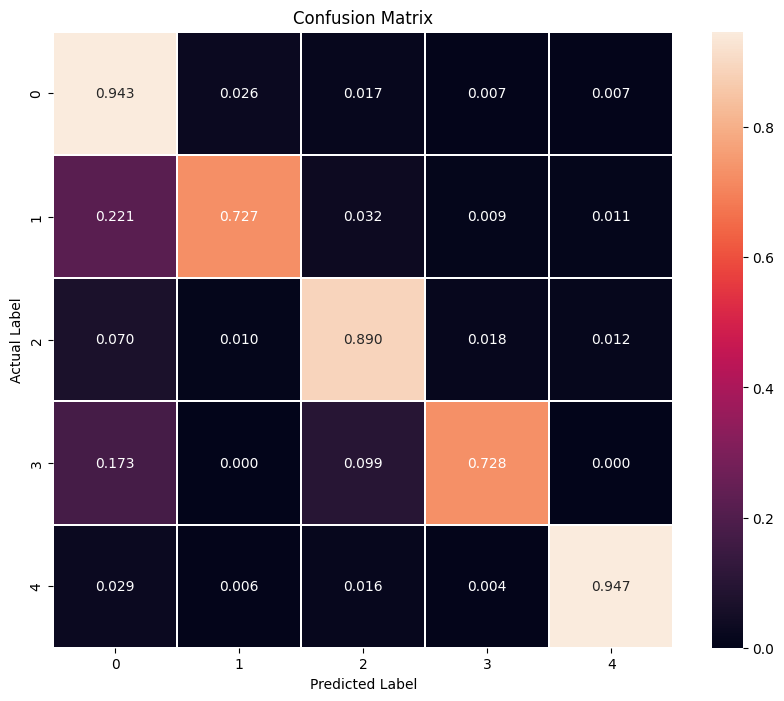

In [69]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(con_mat_decision, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Standardize the data for SVM

In [83]:
#df1.describe()

In [132]:
scaler_df1 = StandardScaler().fit(df1)


In [133]:
scaled_df1_features = scaler_df1.transform(df1)

LinearSVC

In [99]:
model_linear_svc = LinearSVC(random_state=42, dual=True, max_iter=5000)

In [100]:
Model5 = Model(model_linear_svc, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
fit_model5 = Model5.model_fit(X_train_smotek, y_train_smotek)

m:\SOL\ML_intern_task\VENV_for_ECG\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
prediction5 = Model5.model_pred(X_test_smotek)
model_accu_5, model_con_mat_5, model_cl_report_5, model_recall_5, model_precision_5, model_F1_5 = Model5.model_report(prediction5, y_test_smotek)

In [ ]:
print(f"accuracy is: {model_accu_5}")
print(f"Precision: {model_precision_5}")
print(f"Recall: {model_recall_5}")
print(f"F1_Score: {model_F1_5}")
print(f"confusion_matrix:\n {np.around(model_con_mat_5, decimals=3)}")
print(f"classification:\n {model_cl_report_5}")

In [ ]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_5, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

SVM

In [17]:
model_SVM = SVC(random_state=42, kernel='rbf', C=1.0, gamma='auto')

In [18]:
Model6 = Model(model_SVM, X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek)
fit_model6 = Model6.model_fit(X_train_tomek, y_train_tomek)

In [ ]:
prediction6 = Model6.model_pred(X_test_tomek)
model_accu_6, model_con_mat_6, model_cl_report_6, model_recall_6, model_precision_6, model_F1_6 = Model6.model_report(prediction6, y_test_smotek)

In [19]:
print(f"accuracy is: {model_accu_6}")
print(f"Precision: {model_precision_6}")
print(f"Recall: {model_recall_6}")
print(f"F1_Score: {model_F1_6}")
print(f"confusion_matrix:\n {np.around(model_con_mat_6, decimals=3)}")
print(f"classification:\n {model_cl_report_6}")

NameError: name 'prediction6' is not defined

In [ ]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_6, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

k-nearest

In [34]:
model_k_nearest = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

In [35]:
Model7 = Model(model_k_nearest, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
fit_model7 = Model7.model_fit(X_train_smotek, y_train_smotek)

In [ ]:
prediction7 = Model7.model_pred(X_test_smotek)
model_accu_7, model_con_mat_7, model_cl_report_7, model_recall_7, model_precision_7, model_F1_7 = Model7.model_report(prediction7, y_test_smotek)

In [ ]:
print(f"accuracy is: {model_accu_7}")
print(f"Precision: {model_precision_7}")
print(f"Recall: {model_recall_7}")
print(f"F1_Score: {model_F1_7}")
print(f"confusion_matrix:\n {np.around(model_con_mat_7, decimals=3)}")
print(f"classification:\n {model_cl_report_7}")

PCA

In [ ]:
'''
X_train_pca = PCA(n_components=2).fit_transform(X_train)
X_test_pca = PCA(n_components=2).fit_transform(X_test)
'''

## Hyperparameter Tuning

### RandomSearchCV

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:

# Defining the parameter grid for RandomizedSearchCV
param_grid = {
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Add other solvers if appropriate for your dataset
    'C': np.logspace(-4, 4, 20),  # Regularization strengths
    'penalty': ['l2'],  # Adjust based on solver compatibility
}

# Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=60, cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)

# Fitting the model
random_search.fit(X_train, y_train)

# Best parameters found by RandomizedSearchCV
print("Best Parameters: ", random_search.best_params_)

# Predicting with the best estimator
y_pred = random_search.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f'Classification Report:\n{class_report}')


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters:  {'solver': 'saga', 'penalty': 'l2', 'C': 78.47599703514607}
Accuracy: 0.915881445948261
Confusion Matrix:
[[14309    31   202     7    28]
 [  209   187    21     0     1]
 [  701     4   385    14    16]
 [  102     0    11    39     0]
 [  112     1    13     0  1118]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     14577
         1.0       0.84      0.45      0.58       418
         2.0       0.61      0.34      0.44      1120
         3.0       0.65      0.26      0.37       152
         4.0       0.96      0.90      0.93      1244

    accuracy                           0.92     17511
   macro avg       0.80      0.59      0.65     17511
weighted avg       0.90      0.92      0.91     17511



m:\SOL\ML_intern_task\VENV_for_ECG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Grid Search CV

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
# Defining the parameter grid for GridSearchCV
from turtle import mode


param_grid = {
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Consider solver compatibility with penalty
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'penalty': ['l2'],  # L2 is used by the solvers mentioned
}

# Setting up GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

# Using the best estimator found to make predictions
y_pred = grid_search.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f'Classification Report:\n{class_report}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters:  {'C': 78.47599703514607, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.9159956598709382
Confusion Matrix:
[[14304    31   206     7    29]
 [  208   187    22     0     1]
 [  696     5   388    15    16]
 [   95     0    11    46     0]
 [  113     3    13     0  1115]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     14577
         1.0       0.83      0.45      0.58       418
         2.0       0.61      0.35      0.44      1120
         3.0       0.68      0.30      0.42       152
         4.0       0.96      0.90      0.93      1244

    accuracy                           0.92     17511
   macro avg       0.80      0.59      0.66     17511
weighted avg       0.91      0.92      0.91     17511



In [40]:
from sklearn.linear_model import SGDClassifier

In [97]:
from sklearn import preprocessing

In [ ]:
model_SGD = SGDClassifier()